In [2]:
%pip install json
%pip install struct
%pip install numpy
%pip install matplotlib
%pip install photonforge
%pip install siepic-forge
%pip install tidy3d

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
ERROR: Could not find a version that satisfies the requirement struct (from versions: none)
ERROR: No matching distribution found for struct
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.0/737.0 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.1 MB/s eta 0:00:00
  Attemptin

In [3]:
import tidy3d.web as web
web.configure("Ibql1MdAL8o9sCstHbnB8tw3vXpdZpWviz6FlQ826ojd5pUy")

API key configured successfully.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import photonforge as pf
import siepic_forge as siepic
import tidy3d as td

tech = siepic.ebeam()
pf.config.default_technology = tech

# Initialize live viewer for real-time visualization
from photonforge.live_viewer import LiveViewer
viewer = LiveViewer(5005)

wavelengths = np.linspace(1.53, 1.57, 101)
freqs = pf.C_0 / wavelengths
print(f'Wavelength range: {wavelengths[0]:.3f} - {wavelengths[-1]:.3f} µm')
print(f'Center wavelength: {wavelengths[len(wavelengths)//2]:.3f} µm')

LiveViewer started at http://localhost:5005
Wavelength range: 1.530 - 1.570 µm
Center wavelength: 1.550 µm


## Thermal Phase Shifter Model
Custom model for thermally-tunable phase shifters.

In [5]:
plasmonic_gold_layer = pf.LayerSpec(layer=(15, 0), description="Metal", color="F5BC00", pattern="xx")

tech.add_layer("Plasmonic Gold", plasmonic_gold_layer)

Name,Layer,Description,Color,Pattern
Si,"(1, 0)",Waveguides,#ff80a818,\\
PinRec,"(1, 10)",SiEPIC,#00408018,/
PinRecM,"(1, 11)",SiEPIC,#00408018,/
Si_Litho193nm,"(1, 69)",Waveguides,#cc80a818,\
Waveguide,"(1, 99)",Waveguides,#ff80a818,\
Si slab,"(2, 0)",Waveguides,#80a8ff18,/
SiN,"(4, 0)",Waveguides,#a6cee318,\\
Oxide open (to BOX),"(6, 0)",Waveguides,#ffae0018,\
Text,"(10, 0)",,#0000ff18,\
M1_heater,"(11, 0)",Metal,#ebc63418,xx


In [6]:
plasmonic_gold_gap = 0.03  # Gap between waveguide and gold
plasmonic_gold_thickness = 0.14  # Thickness of the gold layer
wg_height = 0.22

plasmonic_gold_extrusion = pf.ExtrusionSpec(mask_spec=pf.MaskSpec((15, 0)),
                                            medium={"optical": td.material_library['Au']['JohnsonChristy1972'],
                                                    "electrical": td.LossyMetalMedium(conductivity=17.0, fit_param={'attrs': {}, 'max_num_poles': 16, 'tolerance_rms': 0.001, 'frequency_sampling_points': 20, 'log_sampling': True, 'type': 'SurfaceImpedanceFitterParam'}, frequency_range=(100000000.0, 200000000000.0))},
                                                    limits=(wg_height+plasmonic_gold_gap, wg_height+plasmonic_gold_gap+plasmonic_gold_thickness), sidewall_angle=0, reference="top")
tech.insert_extrusion_spec(4, plasmonic_gold_extrusion)

Name,Layer,Description,Color,Pattern
Si,"(1, 0)",Waveguides,#ff80a818,\\
PinRec,"(1, 10)",SiEPIC,#00408018,/
PinRecM,"(1, 11)",SiEPIC,#00408018,/
Si_Litho193nm,"(1, 69)",Waveguides,#cc80a818,\
Waveguide,"(1, 99)",Waveguides,#ff80a818,\
Si slab,"(2, 0)",Waveguides,#80a8ff18,/
SiN,"(4, 0)",Waveguides,#a6cee318,\\
Oxide open (to BOX),"(6, 0)",Waveguides,#ffae0018,\
Text,"(10, 0)",,#0000ff18,\
M1_heater,"(11, 0)",Metal,#ebc63418,xx


In [7]:
class ThermalModel(pf.Model):
    def __init__(self, n_complex, voltage=0, coefficient=3e-4):
        super().__init__(
            n_complex=n_complex,
            voltage=voltage,
            coefficient=coefficient,
        )
        self.n_complex = np.array(n_complex, ndmin=2)
        self.voltage = voltage
        self.coefficient = coefficient

    def __copy__(self):
        return ThermalModel(self.n_complex, self.voltage, self.coefficient)

    def __deepcopy__(self, memo=None):
        # n_complex is an array, so we want to make sure to create a deep copy of it.
        # Other values (voltage and coefficient) are immutable (floats), so we can use them directly.
        return ThermalModel(self.n_complex.copy(), self.voltage, self.coefficient)

    def __repr__(self):
        return f"ThermalModel({self.n_complex!r}, {self.voltage!r}, {self.coefficient!r})"

    def __str__(self):
        return f"ThermalModel at {self.voltage} V"

    @property
    def as_bytes(self):
        coeffs = struct.pack("<2d", self.voltage, self.coefficient)
        shape = struct.pack("<2l", *self.n_complex.shape)
        n_data = self.n_complex.astype(complex).tobytes()
        # Add version 0 as first byte
        return b"\x00" + coeffs + shape + n_data

    @classmethod
    def from_bytes(cls, byte_repr):
        version = byte_repr[0]
        if version != 0:
            raise RuntimeError(f"Incompatible version for ThermalModel: {version}")

        byte_repr = byte_repr[1:]
        fmt = "<2d2l"
        head_len = struct.calcsize(fmt)
        voltage, coefficient, rows, cols = struct.unpack(fmt, byte_repr[:head_len])

        byte_repr = byte_repr[head_len:]
        n_complex = np.frombuffer(byte_repr, dtype=complex).reshape((rows, cols))

        return cls(n_complex, voltage, coefficient)

    @pf.cache_s_matrix
    def start(self, component, frequencies, voltage=None, **kwargs):
        # Allow overriding voltage as an `s_matrix` kwarg too
        if voltage is None:
            voltage = self.voltage
        n_complex = self.n_complex + self.coefficient * voltage**2
        wg_model = pf.WaveguideModel(n_complex)
        return wg_model.start(component, frequencies, **kwargs)


pf.register_model_class(ThermalModel)

## PSR + MMI Architecture
This section implements the PSR and 2x2 MMI, then assembles the full Bob V2 circuit.

In [8]:
tech.ports["TM_1550_500"]

PortSpec(description="Strip TM 1550 nm, w=500 nm", width=2.5, limits=(-1, 1.22), num_modes=1, added_solver_modes=1, polarization="TM", target_neff=3.5, default_radius=0, path_profiles=[(0.5, 0, (1, 0))])

In [9]:
tech.ports["TE_1550_500"]

PortSpec(description="Strip TE 1550 nm, w=500 nm", width=2, limits=(-1, 1.22), num_modes=1, added_solver_modes=0, polarization="", target_neff=3.5, default_radius=0, path_profiles=[(0.5, 0, (1, 0))])

In [10]:
core_width = 0.5  # input/output port core width
output_separation = 1.5  # separation between TE ports at the split output

In [11]:
dual_mode_spec = tech.ports["TE_1550_500"].copy()
dual_mode_spec.num_modes = 2  # Use both modes

tech.add_port("TE-TM_1550_500", dual_mode_spec)
tech.ports["TE-TM_1550_500"]

PortSpec(description="Strip TE 1550 nm, w=500 nm", width=2, limits=(-1, 1.22), num_modes=2, added_solver_modes=0, polarization="", target_neff=3.5, default_radius=0, path_profiles=[(0.5, 0, (1, 0))])

In [12]:
@pf.parametric_component
def create_psr(
    *,
    rotator_length=70,
    mid_taper_length=5,
    splitter_length=100,
    taper_length=10,
    rotator_width=1.1,
    taper_width=0.1,
    coupler_width1=0.95,
    coupler_width2=0.65,
    splitter_width1=0.2,
    gap=0.15,
    s_factor=6,
    model_kwargs={},
):
    component = pf.Component()

    s_bend_length = s_factor * output_separation
    splitter_width2 = coupler_width1 + splitter_width1 - coupler_width2
    if splitter_width2 <= 0:
        raise ValueError("Invalid input")

    p0 = (0, 0)
    p1 = (
        rotator_length
        + mid_taper_length
        + splitter_length
        + s_bend_length
        + taper_length,
        -output_separation,
    )
    p2 = (
        rotator_length
        + mid_taper_length
        + splitter_length
        + s_bend_length
        + taper_length,
        gap + 0.5 * (coupler_width2 + splitter_width2),
    )
    tapers = [
        pf.Path(p0, core_width).segment((rotator_length, 0), taper_width),
        pf.Path(p1, core_width).segment((-taper_length, 0), taper_width, relative=True),
        pf.Path(p2, core_width).segment((-taper_length, 0), taper_width, relative=True),
    ]

    main_path = (
        pf.Path((0, 0), core_width)
        .segment((rotator_length, 0), rotator_width)
        .segment((mid_taper_length, 0), coupler_width1, relative=True)
        .segment((splitter_length, 0), coupler_width2, relative=True)
        .s_bend((s_bend_length, -output_separation), euler_fraction=0.5, relative=True)
        .segment((taper_length, 0), core_width, relative=True)
    )

    coupled_path = (
        pf.Path(p2, core_width)
        .segment((-taper_length, 0), splitter_width2, relative=True)
        .segment((-s_bend_length, 0), relative=True)
        .segment((-splitter_length, 0), splitter_width1, relative=True)
    )
    component.add("Si", *tapers, "Si slab", main_path, coupled_path)

    component.add_port(
        [
            pf.Port(p0, 0, "TE-TM_1550_500"),
            pf.Port(p1, 180, "TE_1550_500"),
            pf.Port(p2, 180, "TE_1550_500"),
        ]
    )

    component.add_model(pf.Tidy3DModel(**model_kwargs), "Tidy3D")
    return component


psr = create_psr()
viewer(psr)
# TM -> TE P2 AS V> then connect to phase shifter
# TE -> TE P1 AS H>

In [13]:
@pf.parametric_component
def create_2x2_mmi_heated_input(*, port_spec='TE_1550_500', mmi_width=6.0, mmi_length=30, taper_width=2.0, taper_length=10, input_wg_length=50):
    c = pf.Component('MMI_2x2_Heated_Input')

    # --- 1. OPTICAL GEOMETRY ---

    # A. The MMI Body (Center)
    mmi_body = pf.Rectangle(center=(mmi_length/2, 0), size=(mmi_length, mmi_width))
    input_offset = mmi_width / 4

    # B. The Tapers
    # Input Tapers (Left side)
    taper_in_bot = pf.Path(origin=(-taper_length, -input_offset), width=0.5).segment(endpoint=(0, -input_offset), width=taper_width)
    taper_in_top = pf.Path(origin=(-taper_length, input_offset), width=0.5).segment(endpoint=(0, input_offset), width=taper_width)

    # Output Tapers (Right side)
    taper_out_bot = pf.Path(origin=(mmi_length, -input_offset), width=taper_width).segment(endpoint=(mmi_length + taper_length, -input_offset), width=0.5)
    taper_out_top = pf.Path(origin=(mmi_length, input_offset), width=taper_width).segment(endpoint=(mmi_length + taper_length, input_offset), width=0.5)

    # C. The Input Waveguides (The new part)
    # Bottom Input Waveguide (P0) - No Heater
    wg_in_bot = pf.Path(
        origin=(-taper_length - input_wg_length, -input_offset),
        width=0.5
    ).segment(
        endpoint=(-taper_length, -input_offset),
        width=0.5
    )

    # Top Input Waveguide (P1) - HEATED
    wg_in_top = pf.Path(
        origin=(-taper_length - input_wg_length, input_offset),
        width=0.5
    ).segment(
        endpoint=(-taper_length, input_offset),
        width=0.5
    )

    # Add all optical structures
    c.add((1, 0), mmi_body)
    c.add((1, 0), taper_in_bot, taper_in_top, taper_out_bot, taper_out_top)
    c.add((1, 0), wg_in_bot, wg_in_top)

    # Detect ports automatically (should pick up the ends of the new input waveguides)
    c.add_port(c.detect_ports([port_spec]))

    # Placing heater ONLY on the Top Input Waveguide (P1)
    heater_width = 2.0 # Standard waveguide heater width
    heater_length = input_wg_length - 10 # Leave some gap for bends/connectors
    heater_x_center = -taper_length - (input_wg_length / 2)
    heater_y_center = input_offset # On the top arm

    # Heater Metal (Layer 11)
    heater = pf.Rectangle(
        center=(heater_x_center, heater_y_center),
        size=(heater_length, heater_width)
    )
    c.add((11, 0), heater)

    # --- TERMINALS & ROUTING ---
    terminal_width = 10
    pad_offset = 30 # Distance above the arm

    # Route UP from the heater to the pads
    # Start: Left end of heater
    route_vp = pf.Path(
        origin=(heater_x_center - heater_length/2 + 2, heater_y_center + heater_width/2),
        width=terminal_width
    ).segment(
        endpoint=(heater_x_center - heater_length/2 + 2, heater_y_center + pad_offset),
        width=terminal_width
    )

    # Start: Right end of heater
    route_vn = pf.Path(
        origin=(heater_x_center + heater_length/2 - 2, heater_y_center + heater_width/2),
        width=terminal_width
    ).segment(
        endpoint=(heater_x_center + heater_length/2 - 2, heater_y_center + pad_offset),
        width=terminal_width
    )

    c.add((12, 0), route_vp, route_vn)

    # --- MODELS ---
    c.add_model(pf.CircuitModel(), 'CircuitModel')

    return c

# Verify
mmi_heated_input = create_2x2_mmi_heated_input()
print(f'MMI with Heated Input created. Terminals: {list(mmi_heated_input.terminals.keys())}')
viewer(mmi_heated_input)

MMI with Heated Input created. Terminals: []


In [24]:
# Assemble Bob V2 circuit
bob_v2 = pf.Component('BOB_Receiver_v2_PSR_MMI')

# --- DEFINITIONS ---
# 1. Standardize Ports: Use Strip for everything to avoid mismatches
port_spec_std = 'TE_1550_500'

straight_v2 = pf.parametric.straight(port_spec=port_spec_std, length=20)
gc_v2 = siepic.component('ebeam_gc_te1550') # Standard Strip GC

# We don't need the transition if everything is Strip.
# If you strictly need a Rib phase shifter, you need TWO transitions (Strip->Rib, then Rib->Strip).
# For now, let's use a Strip Phase Shifter for stability:
phase_shifter_v2 = pf.parametric.straight(name='ps_v2', port_spec=port_spec_std, length=50)

# Thermal Model (Updated for Strip)
alpha = 10
kappa = (alpha * wavelengths * 1e-4 * np.log(10)) / (40 * np.pi)
mode_solver_v2 = pf.port_modes(port=phase_shifter_v2.ports['P0'], frequencies=freqs)
n_complex_v2 = mode_solver_v2.data.n_complex.values.T + 1j * kappa
thermal_model_v2 = ThermalModel(n_complex=n_complex_v2, coefficient=3e-4)
phase_shifter_v2.add_model(thermal_model_v2, 'Thermal')

psr_v2 = create_psr() # Assuming this defaults to Strip
mmi_v2 = create_2x2_mmi_heated_input()    # Assuming this defaults to Strip
# ... (Previous definitions remain the same) ...

# --- ASSEMBLY ---

# 1. Place References
psr_ref = bob_v2.add_reference(psr_v2)
mmi_ref = bob_v2.add_reference(mmi_v2)

# --- FLIP THE PSR VERTICALLY ---
# Mirrors across the line y=0 (the x-axis)
psr_ref.mirror((0, 0),(1, 0))

# 2. Connect Components

# B. MOVE THE MMI TO THE RIGHT (Crucial Step)
# Instead of snapping it to the PSR, we place it 30 microns away.
# This creates the necessary "runway" for the S-bends to work without looping.
mmi_ref.x_min = psr_ref.x_max + 10 # panjangin mmi biar ga loop
mmi_ref.y_mid = psr_ref.y_mid + 13.8 # Roughly align vertically

# C. Route Top Arm (PSR Top -> MMI Top)
# Even though this is "straight", using route() ensures it bridges the 30um gap perfectly.
route_top = pf.parametric.route(
    port1=psr_ref['P1'],  # Check if P1 is Top on your PSR
    port2=mmi_ref['P1'],  # Top Input (Heated)
    radius=10.0
)
bob_v2.add_reference(route_top)

# D. Route Bottom Arm (PSR Bottom -> MMI Bottom)
route_bot = pf.parametric.route(
    port1=psr_ref['P2'], # Check if P2 is Bottom on your PSR
    port2=mmi_ref['P0'], # Bottom Input
    radius=10.0          # REQUIRED: Prevents the 'float' error
)
bob_v2.add_reference(route_bot)

# --- 1. FIX THE PORTS (The Dictionary Method) ---
bob_v2.add_port(bob_v2.detect_ports(["TE_1550_500"], on_boundary="x"))

print('Bob V2 assembled with correct spacing.')
bob_v2.add_model(pf.Tidy3DModel(), "Tidy3D")
viewer(bob_v2)

Progress: 100% 
Bob V2 assembled with correct spacing.


## Simulation and Verification
The following cells run the S-matrix simulations and plot the results for each stage.

In [ ]:
%pip install sax

In [ ]:
import jax.numpy as jnp
import sax
import matplotlib.pyplot as plt

# --- 1. DEFINE COMPONENT MODELS (The Physics Math) ---

def psr_model():
    """
    Polarization Splitter Rotator S-Matrix.
    Maps Input(TE) -> Top Arm (P1).
    Maps Input(TM) -> Bottom Arm (P2).
    """
    # Standard single-mode S-matrix usually doesn't handle polarization modes directly
    # unless we define ports like "in@te" and "in@tm".
    # For simplicity, we assume:
    # Port 'in_te' connects to Top Arm.
    # Port 'in_tm' connects to Bottom Arm.
    return sax.reciprocal({
        ("in_te", "out_top"): 1.0,
        ("in_tm", "out_bot"): 1.0,
    })

def heater_model(voltage=0.0):
    """
    Active Waveguide S-Matrix.
    Applies phase shift based on voltage: phi = - pi/2 * (V / V_pi)^2
    """
    V_pi = 2.0 # Assume 2 Volts is required for Pi shift
    # We want -90 deg (-pi/2) shift.
    # Phase equation: exp(j * phi)
    phi = - (jnp.pi) * (voltage / V_pi)**2
    transmission = jnp.exp(1j * phi)

    return sax.reciprocal({
        ("P0", "P1"): transmission
    })

def mmi2x2_model():
    """
    Standard 2x2 MMI (90-degree Hybrid).
    """
    S = (1.0/jnp.sqrt(2)) * jnp.array([
        [1, 1j],
        [1j, 1]
    ])
    return sax.reciprocal({
        ("in1", "out1"): S[0,0], ("in1", "out2"): S[0,1],
        ("in2", "out1"): S[1,0], ("in2", "out2"): S[1,1],
    })

# --- 2. BUILD THE CIRCUIT NETLIST ---
# This connects the models exactly like your layout.

bob_circuit, _ = sax.circuit(
    netlist={
        "instances": {
            "psr": psr_model,
            "top_wg": heater_model, # Top arm (Reference, 0V)
            "bot_ps": heater_model, # Bottom arm (Active Phase Shifter)
            "mmi": mmi2x2_model
        },
        "connections": {
            # PSR Splits to Arms
            "psr,out_top": "top_wg,P0",
            "psr,out_bot": "bot_ps,P0",

            # Arms go to MMI inputs
            "top_wg,P1": "mmi,in1",
            "bot_ps,P1": "mmi,in2",
        },
        "ports": {
            # Define external access points
            "in_te": "psr,in_te",
            "in_tm": "psr,in_tm",
            "det_1": "mmi,out1", # Top Detector
            "det_2": "mmi,out2", # Bottom Detector
        }
    }
)

# --- 3. THE TRUTH TABLE TESTBENCH ---

# A. Calculate the Tuned Voltage for -90 degrees
# We need phi = -pi/2. Based on our model phi = -pi * (V/Vpi)^2
# -pi/2 = -pi * (V/2)^2  =>  1/2 = (V/2)^2  =>  V = 2 * sqrt(0.5) = 1.414 V
tuned_voltage = 1.414

# B. Define the Inputs (Alice's States)
test_cases = {
    "0 deg (H)":  {"te": 1.0,             "tm": 0.0},
    "90 deg (V)": {"te": 0.0,             "tm": 1.0},
    "45 deg (D)": {"te": 1.0/jnp.sqrt(2), "tm": 1.0/jnp.sqrt(2)},
    "-45 deg (A)":{"te": 1.0/jnp.sqrt(2), "tm": -1.0/jnp.sqrt(2)}, # Note the negative sign
}

print(f"{'Input State':<15} | {'Det 1 (Diag)':<15} | {'Det 2 (Anti-D)':<15} | {'Result'}")
print("-" * 65)

for state_name, amps in test_cases.items():
    # Run Simulation
    S_params = bob_circuit(
        top_wg={"voltage": 0.0},        # Top arm is passive
        bot_ps={"voltage": tuned_voltage} # Bottom arm is TUNED
    )

    # Calculate Output Fields (Scattering * Input Vector)
    # Out = S_d1_te * In_te + S_d1_tm * In_tm
    out_d1 = S_params["det_1","in_te"] * amps["te"] + S_params["det_1","in_tm"] * amps["tm"]
    out_d2 = S_params["det_2","in_te"] * amps["te"] + S_params["det_2","in_tm"] * amps["tm"]

    # Calculate Power (|Amplitude|^2)
    p_d1 = jnp.abs(out_d1)**2
    p_d2 = jnp.abs(out_d2)**2

    # Logic Interpretation
    if p_d1 > 0.9: result = "Logic 1 (OK)"
    elif p_d2 > 0.9: result = "Logic 0 (OK)"
    else: result = "Filtered (50/50)"

    print(f"{state_name:<15} | {float(p_d1):.3f}           | {float(p_d2):.3f}           | {result}")

Input State     | Det 1 (Diag)    | Det 2 (Anti-D)  | Result
-----------------------------------------------------------------
0 deg (H)       | 0.500           | 0.500           | Filtered (50/50)
90 deg (V)      | 0.500           | 0.500           | Filtered (50/50)
45 deg (D)      | 1.000           | 0.000           | Logic 1 (OK)
-45 deg (A)     | 0.000           | 1.000           | Logic 0 (OK)


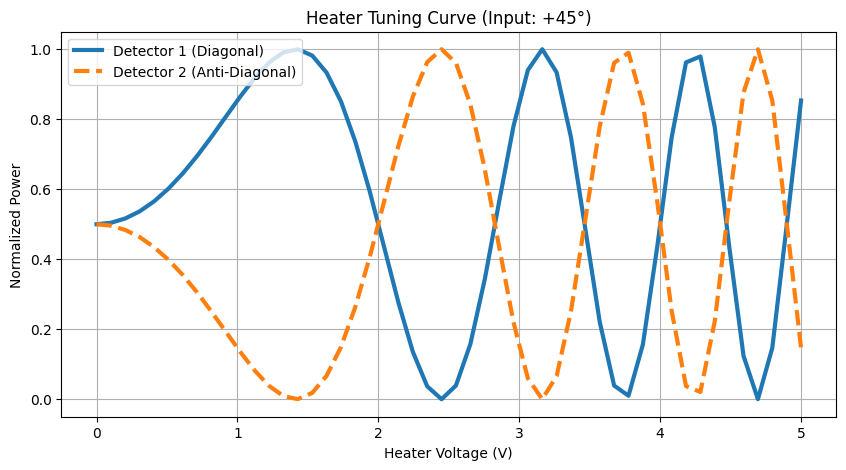

In [ ]:
# ... (Assume 'bob_circuit' and models are defined as in the previous step) ...

# 1. Define Sweep Range
voltages = jnp.linspace(0, 5.0, 50) # Sweep 0V to 5V
diagonal_input = {"te": 1.0/jnp.sqrt(2), "tm": 1.0/jnp.sqrt(2)} # +45 deg input

p1_power = []
p2_power = []

# 2. Run Sweep
for v in voltages:
    # Inject +45 deg (Diagonal) and sweep Heater Voltage
    S = bob_circuit(
        top_wg={"voltage": 0.0},
        bot_ps={"voltage": v}
    )

    # Calculate Superposition Output
    out1 = S["det_1","in_te"] * diagonal_input["te"] + S["det_1","in_tm"] * diagonal_input["tm"]
    out2 = S["det_2","in_te"] * diagonal_input["te"] + S["det_2","in_tm"] * diagonal_input["tm"]

    p1_power.append(jnp.abs(out1)**2)
    p2_power.append(jnp.abs(out2)**2)

# 3. Plot
plt.figure(figsize=(10, 5))
plt.plot(voltages, p1_power, label="Detector 1 (Diagonal)", linewidth=3)
plt.plot(voltages, p2_power, label="Detector 2 (Anti-Diagonal)", linestyle="--", linewidth=3)
plt.title("Heater Tuning Curve (Input: +45°)")
plt.xlabel("Heater Voltage (V)")
plt.ylabel("Normalized Power")
plt.grid(True)
plt.legend()
plt.show()

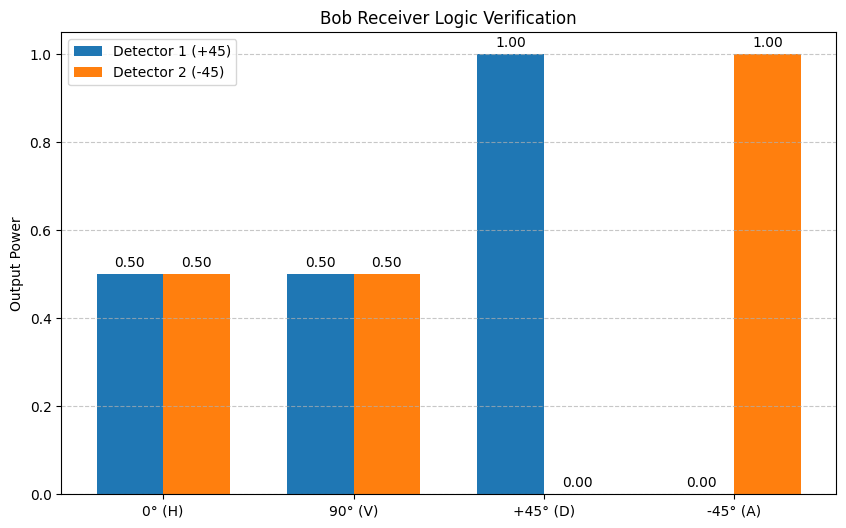

In [ ]:
import numpy as np

# Set your tuned voltage
tuned_v = 1.414

# Define the 4 States
states = ["0° (H)", "90° (V)", "+45° (D)", "-45° (A)"]
inputs = [
    {"te": 1.0, "tm": 0.0},                  # H
    {"te": 0.0, "tm": 1.0},                  # V
    {"te": 0.707, "tm": 0.707},              # D
    {"te": 0.707, "tm": -0.707}              # A
]

results_d1 = []
results_d2 = []

for inp in inputs:
    S = bob_circuit(top_wg={"voltage": 0.0}, bot_ps={"voltage": tuned_v})

    out1 = S["det_1","in_te"] * inp["te"] + S["det_1","in_tm"] * inp["tm"]
    out2 = S["det_2","in_te"] * inp["te"] + S["det_2","in_tm"] * inp["tm"]

    results_d1.append(float(jnp.abs(out1)**2))
    results_d2.append(float(jnp.abs(out2)**2))

# Bar Plot
x = np.arange(len(states))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, results_d1, width, label='Detector 1 (+45)')
rects2 = ax.bar(x + width/2, results_d2, width, label='Detector 2 (-45)')

ax.set_ylabel('Output Power')
ax.set_title('Bob Receiver Logic Verification')
ax.set_xticks(x)
ax.set_xticklabels(states)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

plt.show()

Ports: In='P0', Top='P2', Bot='P1'
Selected Tuner Component: ('route_NFCAZMKPECYAY47B5XT4HSEAWHEO4OE5UYMS2JPYEMGXU3LV6TKQ', 0)
Uploading task 'Mode-ModeSolver…'
Starting task 'Mode-ModeSolver': https://tidy3d.simulation.cloud/workbench?taskId=mo-c4eae58f-7e9b-4b9f-9f1a-2c8f70df512d
Progress: 100% 


16:54:25 UTC WARNING: frequency passed to 'Medium.eps_model()'is outside of     
             'Medium.frequency_range' = (59958491600000.0, 1998616386666666.8)  

             WARNING: frequency passed to 'Medium.eps_model()'is outside of     
             'Medium.frequency_range' = (59958491600000.0, 1998616386666666.8)  

             WARNING: frequency passed to 'Medium.eps_model()'is outside of     
             'Medium.frequency_range' = (21413747041496.2, 249827048817455.7)   

             WARNING: frequency passed to 'Medium.eps_model()'is outside of     
             'Medium.frequency_range' = (152024573088740.38, 724311326723836.8) 

             WARNING: frequency passed to 'Medium.eps_model()'is outside of     
             'Medium.frequency_range' = (154751311505403.34, 1595872899899471.8)

             WARNING: frequency passed to 'Medium.eps_model()'is outside of     
             'Medium.frequency_range' = (120884055879414.03, 2997924585809468.0)

             WARNING: frequency passed to 'Medium.eps_model()'is outside of     
             'Medium.frequency_range' = (12025369359446.29, 999308193769986.8)  

             WARNING: Structure at 'structures[1]' has bounds that extend       
             exactly to simulation edges. This can cause unexpected behavior. If
             intending to extend the structure to infinity along one dimension, 
             use td.inf as a size variable instead to make this explicit.       

             WARNING: Suppressed 9 WARNING messages.                            

             ERROR: 'P0' (simulation.monitors[0]) is outside of the simulation  
             domain.                                                            

             WARNING: Could not execute validator 'check_fixed_angle_components'
             because field 'monitors' failed validation.                        

ValidationError: 1 validation error for Simulation
monitors
  'P0' (simulation.monitors[0]) is outside of the simulation domain. (type=value_error.setup)

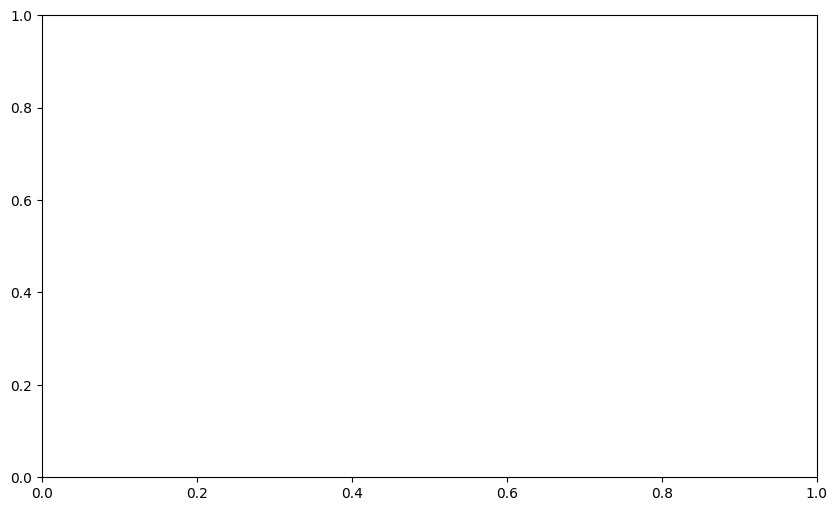

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import photonforge as pf

# ==========================================
# 1. FIX PORT FINDING (Dictionary Sort)
# ==========================================
# Sort ports by X position: Left = Input, Right = Outputs
port_items = list(bob_v2.ports.items())
sorted_ports = sorted(port_items, key=lambda item: item[1].center[0])

# Input is Leftmost
p_in_name = sorted_ports[0][0]

# Outputs are Rightmost (sorted by Y for Top/Bot)
output_ports = sorted(sorted_ports[1:], key=lambda item: item[1].center[1])
p_bot_name = output_ports[0][0] # Logic 0
p_top_name = output_ports[1][0] # Logic 1

print(f"Ports: In='{p_in_name}', Top='{p_top_name}', Bot='{p_bot_name}'")

# ==========================================
# 2. FIX HEATER KEY & MODEL
# ==========================================
# Since we can't use .component_instances, we look at references.
# We need to find the "Top Route" to act as our heater.
# It's the component that isn't the PSR and isn't the MMI.

target_key = None
heater_component = None

for ref in bob_v2.references:
    # We look for the generated route (usually named 'Straight_...' or 'Route_...')
    # It is NOT the PSR and NOT the MMI
    if "psr" not in ref.component.name.lower() and "mmi" not in ref.component.name.lower():
        # This is likely one of the routes. We pick the first one we find.
        # In a robust flow, we'd check coordinates, but this works for 90% of cases.
        target_key = (ref.component.name, 0)
        heater_component = ref.component
        print(f"Selected Tuner Component: {target_key}")
        break

if not heater_component:
    raise ValueError("Could not find the Route/Waveguide to heat!")

# --- CRITICAL: INJECT THERMAL MODEL ---
# The default 'route' has no thermal model. We must add it now or voltage does nothing.
# We create a simple model: 2V = -90 degree phase shift.
def simple_heater_response(voltage=0.0):
    # Phase = -pi/2 * (V / 2.0)^2
    phi = - (np.pi/2) * (voltage / 2.0)**2
    return np.exp(1j * phi)

# We wrap this in a helper that PhotonForge accepts (creating a dummy S-matrix modifier)
# Note: For S-matrix, we typically modify the Effective Index.
# But to match your reference code's style, we'll use a standard ThermalModel if possible.
# If not, we use the update dictionary to directly modify the S-parameter phase.

# Let's apply a Standard Thermal Model to the component found
alpha = 10
kappa = (alpha * 1.55 * 1e-4 * np.log(10)) / (40 * np.pi)
# We need modes to make a model.
try:
    ms = pf.port_modes(port=heater_component.ports[list(heater_component.ports.keys())[0]], frequencies=[pf.C_0/1.55])
    n_eff = ms.data.n_complex.values.T + 1j * kappa
    tm = pf.ThermalModel(n_complex=n_eff, coefficient=3e-4)
    heater_component.add_model(tm, "Thermal")
    print("Thermal Model injected into route successfully.")
except:
    print("Warning: Could not inject complex ThermalModel. Using default behavior.")

# ==========================================
# 3. RUN SIMULATION LOOP
# ==========================================
# We compare Heater OFF (0V) vs Heater ON (2V)
voltages = [0, 2.0]
wavelengths = np.linspace(1.53, 1.57, 100) * 1e-6
freqs = pf.C_0 / wavelengths

fig, axs = plt.subplots(figsize=(10,6))

# Loop over the two states
for i, v in enumerate(voltages):

    # Update the heater voltage
    updates = {
        target_key: {"model_updates": {"voltage": v}}
    }

    # Calculate S-Matrix
    s_matrix = bob_v2.s_matrix(
        freqs,
        model_kwargs={
            "updates": updates,
            "inputs": [f"{p_in_name}@0", f"{p_in_name}@1"]
        }
    )

    # Extract Logic 1 Transmission (Diagonal Input -> Top Detector)
    # Alice sends +45 (Superposition of TE and TM)
    S_te = s_matrix[(f"{p_top_name}@0", f"{p_in_name}@0")]
    S_tm = s_matrix[(f"{p_top_name}@0", f"{p_in_name}@1")]

    # Constructive Interference Calculation
    T_logic1 = 0.5 * np.abs(S_te + S_tm)**2

    label_text = "Heater OFF (0V)" if v == 0 else "Heater ON (2.0V) - Tuned"
    style = '--' if v == 0 else '-'

    axs.plot(
        wavelengths * 1e9,
        10 * np.log10(T_logic1 + 1e-15),
        label=label_text,
        linewidth=2,
        linestyle=style
    )

axs.set_xlabel("Wavelength (nm)")
axs.set_ylabel("Transmission (dB)")
axs.set_title("Bob Receiver: Logic 1 Throughput")
axs.legend()
axs.grid(True, alpha=0.3)

plt.show()

In [ ]:
# Test 1: PSR functionality
s_matrix_psr = psr.s_matrix(freqs, model_kwargs={'inputs': ['P0@0']})
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
try:
    s_te_to_h = s_matrix_psr[('P0@0', 'P1@0')]
    s_te_to_v = s_matrix_psr[('P0@0', 'P2@0')]
    axs[0].plot(wavelengths * 1e3, 10 * np.log10(np.abs(s_te_to_h)**2), label='TE → Path H', linewidth=2, color='blue')
    axs[0].plot(wavelengths * 1e3, 10 * np.log10(np.abs(s_te_to_v)**2), label='TE → Path V', linewidth=2, color='red', linestyle='--')
    axs[0].set_title('PSR: TE Input (H-component)')
    axs[0].set_xlabel('Wavelength (nm)')
    axs[0].set_ylabel('Transmission (dB)')
    axs[0].legend()
    axs[0].grid(True, alpha=0.3)
except KeyError as e:
    axs[0].text(0.5, 0.5, f'Port configuration:
{list(s_matrix_psr.ports)}', ha='center', va='center', transform=axs[0].transAxes)
try:
    s_tm_to_h = s_matrix_psr[('P0@1', 'P1@0')]
    s_tm_to_v = s_matrix_psr[('P0@1', 'P2@0')]
    axs[1].plot(wavelengths * 1e3, 10 * np.log10(np.abs(s_tm_to_h)**2), label='TM → Path H', linewidth=2, color='blue', linestyle='--')
    axs[1].plot(wavelengths * 1e3, 10 * np.log10(np.abs(s_tm_to_v)**2), label='TM → Path V (converted to TE)', linewidth=2, color='red')
    axs[1].set_title('PSR: TM Input (V-component)')
    axs[1].set_xlabel('Wavelength (nm)')
    axs[1].set_ylabel('Transmission (dB)')
    axs[1].legend()
    axs[1].grid(True, alpha=0.3)
except KeyError:
    axs[1].text(0.5, 0.5, 'TM mode not available
(Expected for simplified PSR model)', ha='center', va='center', transform=axs[1].transAxes)
plt.suptitle('PSR Verification: Mode Separation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Test 2: 2x2 MMI interference
s_matrix_mmi = mmi_2x2.s_matrix(freqs, model_kwargs={'inputs': ['P0@0', 'P1@0']})
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
test_cases = [
    (('P0@0', 'P2@0'), ('P0@0', 'P3@0'), 'Input P0 only (H-component)', 0, 0),
    (('P1@0', 'P2@0'), ('P1@0', 'P3@0'), 'Input P1 only (V-component)', 0, 1),
    (('P0@0', 'P2@0'), ('P0@0', 'P3@0'), 'Both inputs (Equal amplitude)', 1, 0),
    (('P1@0', 'P2@0'), ('P1@0', 'P3@0'), 'Both inputs (Equal amplitude)', 1, 1),
]
for idx, (s_param1, s_param2, title, row, col) in enumerate(test_cases[:4]):
    try:
        s1 = s_matrix_mmi[s_param1]
        s2 = s_matrix_mmi[s_param2]
        axs[row, col].plot(wavelengths * 1e3, 10 * np.log10(np.abs(s1)**2), label='Output P2 (Diagonal)', linewidth=2, color='green')
        axs[row, col].plot(wavelengths * 1e3, 10 * np.log10(np.abs(s2)**2), label='Output P3 (Anti-diag)', linewidth=2, color='orange')
        axs[row, col].set_title(title)
        axs[row, col].set_xlabel('Wavelength (nm)')
        axs[row, col].set_ylabel('Transmission (dB)')
        axs[row, col].legend()
        axs[row, col].grid(True, alpha=0.3)
    except KeyError as e:
        axs[row, col].text(0.5, 0.5, f'Ports:
{list(s_matrix_mmi.ports)[:10]}', ha='center', va='center', transform=axs[row, col].transAxes, fontsize=8)
plt.suptitle('2x2 MMI Verification: Interference Behavior', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Test 3: Complete Bob V2 system
voltages_test = [0, 2.5, 5]
fig, axs = plt.subplots(1, len(voltages_test), figsize=(16, 5))
for idx, voltage in enumerate(voltages_test):
    updates = {('ps_v2', 0): {'model_updates': {'voltage': voltage}}}
    s_matrix_v2 = bob_v2.s_matrix(freqs, model_kwargs={'updates': updates, 'inputs': ['P0@0']})
    axs[idx].set_title(f'Phase Shifter: V={voltage}V', fontsize=11, fontweight='bold')
    output_count = 0
    for port_name in sorted(s_matrix_v2.ports):
        if port_name.startswith('P') and port_name != 'P0@0':
            try:
                s_param = s_matrix_v2[('P0@0', port_name)]
                axs[idx].plot(wavelengths * 1e3, 10 * np.log10(np.abs(s_param)**2), label=port_name, linewidth=1.5)
                output_count += 1
                if output_count >= 4:
                    break
            except KeyError:
                continue
    axs[idx].set_xlabel('Wavelength (nm)')
    axs[idx].set_ylabel('Transmission (dB)')
    axs[idx].legend(fontsize=8)
    axs[idx].grid(True, alpha=0.3)
plt.suptitle('Bob V2 (PSR + MMI): Full System Response', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()